# Learning tensors for General Relativity

In [1]:
from sympy import *
from sympy.tensor.tensor import TensorIndexType, TensorIndex, TensorHead, Tensor, tensor_indices, tensor_heads
from sympy.tensor.toperators import PartialDerivative
init_printing()

## Christoffel symbols for 2D sphere

In [2]:
theta, phi = symbols('theta phi')

### Define a tensor for vectors in 2D spherical $(\theta, \phi)$ coordinates

In [3]:
L = TensorIndexType('L', dummy_name='L', dim=2)
m, n, t, r, q  = tensor_indices('m n t r q', L)
v = tensor_heads('v', [L])
v(m)

### Define the metric

In [4]:
def sph2d_metric():
    "Return the metric tensor for 2D spherical coordinates"
    g = tensor_heads('g', [L, L])
    metric_array = [[1,0],[0,cos(theta)**2]]
    metric_repl = {L: metric_array, g(-m,-n):metric_array}
    metric = g(-m,-n).replace_with_arrays(metric_repl)
    display(g(-m,-n))
    return g, metric

display(sph2d_metric()[1])

⎡1     0   ⎤
⎢          ⎥
⎢      2   ⎥
⎣0  cos (θ)⎦

In [5]:
### Define a tensor (not a true tensor) for the Christoffel symbols

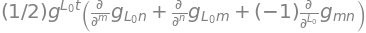

⎡                    ⎡          -sin(θ) ⎤⎤
⎢                    ⎢   0      ────────⎥⎥
⎢⎡0        0      ⎤  ⎢           cos(θ) ⎥⎥
⎢⎢                ⎥  ⎢                  ⎥⎥
⎢⎣0  sin(θ)⋅cos(θ)⎦  ⎢-sin(θ)           ⎥⎥
⎢                    ⎢────────     0    ⎥⎥
⎣                    ⎣ cos(θ)           ⎦⎦

In [6]:
def christoffel(metric_array):
    x = tensor_heads('_', [L])   
    x_repl = {x(q): [theta, phi]}   # what we are differentiating with respect to

    g = tensor_heads('g', [L, L])

    metric_repl = {L: metric_array, g(-m,-n):metric_array}
    christoffel_exp = g(r,t) / 2 * (PartialDerivative(g(-r, -m), x(n)) + PartialDerivative(g(-r, -n), x(m)) - PartialDerivative(g(-m, -n), x(r)))
    christoffel_eval = christoffel_exp.replace_with_arrays(x_repl | metric_repl)
    display(christoffel_exp)

    gamma = tensor_heads('Gamma', [L, L, L])
   
    gamma_repl = {gamma(-m, -n, t): christoffel_eval}
    gamma_eval = gamma(-m, -n, t).replace_with_arrays(gamma_repl)
    gamma(-m, -n, t), gamma_eval

    return gamma, gamma_eval

def test_christoffel():
    g, metric = sph2d_metric()
    gamma, gamma_eval = christoffel(metric)
    display(gamma(-m, -n, m), gamma_eval)

test_christoffel()
    